# Ethan Pence
# CPSMA-3933-01, 12:30 PM - 1:45 PM
# Lab 3

## Problem 1

First, import the requirements and read the contents of the file. I am using sklearn because it's easy.

In [56]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

data = pa.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv")

Get goals and points data.

In [57]:
goals = data[["G"]]
points = data["PTS"]

Create a model and fit it with the data.

In [58]:
linear_model = LinearRegression()
linear_model.fit(goals, points)

LinearRegression()

Plot the data, calculate R squared.

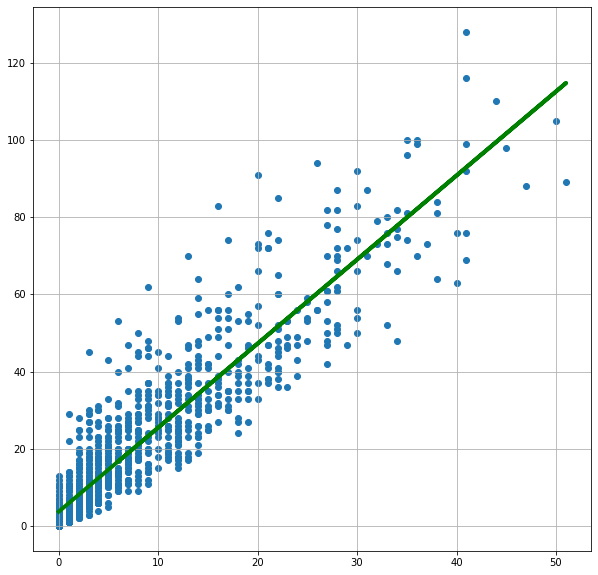

r: 0.8461669386312143


In [59]:
plt.figure(figsize=(10, 10))
plt.scatter(goals, points)
plt.plot(goals, linear_model.predict(goals), color='green', linewidth=4)
plt.grid(True)
plt.show()
print(f"r: {linear_model.score(goals, points)}")

There is a strong correlation between the number of goals a player scores and the amount points they have, of course.

An even greater R-squared value will be found if assists are introduced with a multiple regression.

First, define goals and assists. I will use the y value, points, from before.

In [60]:
goals_assists = data[["G", "A"]]
points = data["PTS"]

Create the model and fit it with the new data.

In [61]:
multiple_model = LinearRegression()
multiple_model.fit(goals_assists, points)

LinearRegression()

Calculate R squared.

In [62]:
print(f"r: {multiple_model.score(goals_assists, points)}")

r: 1.0


There is a perfect correlation between the amount of goals and assists a player performs, and their points.

## Problem 2

Read the contents of the file.

In [125]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')

Setup the data, get Gender, Name/Alias, Death1 data.

In [126]:
data["Dead"] = data["Death1"].apply(lambda x: 1 if x == "YES" else 0)

data = pa.get_dummies(data, columns=["Gender"], drop_first=True)

predictors = ["Appearances", "Gender_MALE"]
predicted = "Dead"

appearances_gender = data[predictors]
dead = data[predicted]

Create and fit model.

In [127]:
log_model = LogisticRegression()
log_model.fit(appearances_gender, dead)

LogisticRegression()

Get accuracy and make prediction

In [128]:
print(log_model.score(appearances_gender, dead))

peter_parker = data[data["Name/Alias"].str.contains("Peter Benjamin Parker", na=False)]

statistics = log_model.predict_proba(peter_parker[predictors])

print(f"Likelihood of survival: {statistics[0][0]}")

0.6473988439306358
Likelihood of survival: 0.09342355263415458


Overall, this model is not very good at prediction. The score is barely better than random chance. It predicts a 9% chance of Peter Parker survivng.

## Problem 3

Read the contents of the file.

In [151]:
data = pa.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv")

Get the time and date data.

In [152]:
data_men = data[data['Gender'] == 'Men']

year_men = data_men[["Games"]]
time_men = data_men["Time"]


data_women = data[data['Gender'] == 'Women']

year_women = data_women[["Games"]]
time_women = data_women["Time"]

Create a model and fit it with the data from men.

In [153]:
linear_model_men = LinearRegression()
linear_model_men.fit(year_men, time_men)

linear_model_women = LinearRegression()
linear_model_women.fit(year_women, time_women)

LinearRegression()

Plot the data for men, calculate R squared.

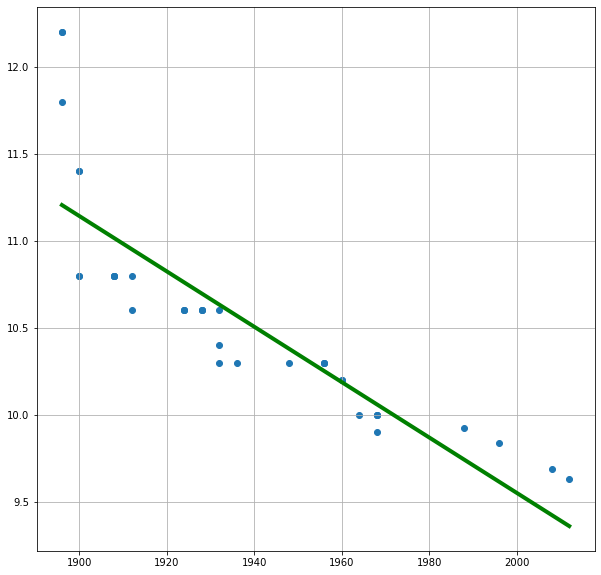

r: 0.7318845010551089


In [154]:
plt.figure(figsize=(10, 10))
plt.scatter(year_men, time_men)
plt.plot(year_men, linear_model_men.predict(year_men), color='green', linewidth=4)
plt.grid(True)
plt.show()
print(f"r: {linear_model_men.score(year_men, time_men)}")

There is a strong correlation between the year and the time scores for men.

Plot the data for women, calculate R Squared.

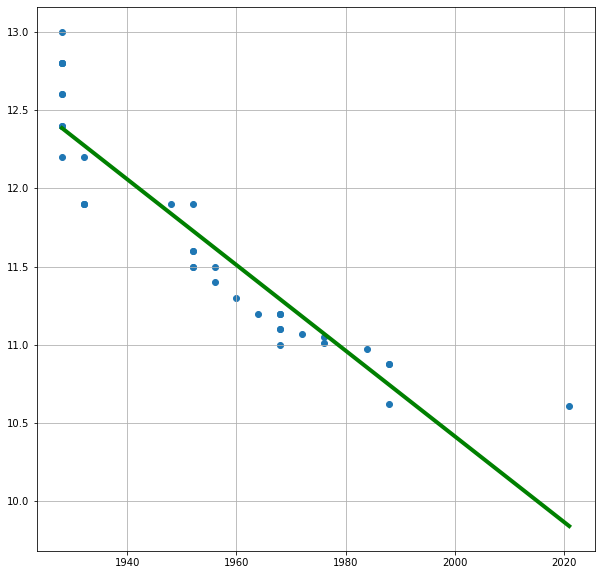

r: 0.8440470286814288


In [155]:
plt.figure(figsize=(10, 10))
plt.scatter(year_women, time_women)
plt.plot(year_women, linear_model_women.predict(year_women), color='green', linewidth=4)
plt.grid(True)
plt.show()
print(f"r: {linear_model_women.score(year_women, time_women)}")

There is a strong correlation between the year and the time scores for women.

Calculate the potential times for men and women in 2024 and 2300.

In [156]:
print(linear_model_men.predict([[2024], [2300]]))
print(linear_model_women.predict([[2024], [2300]]))

[9.16924776 4.77934539]
[9.75908784 2.20830683]


The time expected for year 2024 is 9.169s for men. The time expected for year 2300 is 4.7793s for men.

The time expected for year 2024 is 9.759s for women. The time expected for year 2300 is 2.208s for women.

The best time for a man in year 2024 is 9.784s. The best time for a women in year 2024 is 10.72s.

In both cases, the predictions for 2024 are at least somewhat accurate, both having a high R-squared value. However, the predictions for 2300 are inaccurate, as the model assumes continuous improvement over an unreasonable timeframe. For standard biologic humans, the times listed are impossible. Of course, we have no idea what a '100m dash' might actually look like in 2300.